In [2]:
# From CS111 in-class transcript from Lecture 2, January 9, 2020
import sys

sys.path.append("/Users/Mike/desktop/UCSB/CS/CS111/cs111-2021-fall/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import cs111

%matplotlib inline

np.set_printoptions(precision = 4)

In [7]:
#############################################################################
# Make the temperature matrix (discrete Laplacian operator) in 2 dimensions #
#############################################################################

def make_A(k):
    """Create the matrix of the discrete Laplacian operator in two dimensions on a k-by-k grid.
    Parameters: 
      k: number of grid points in each dimension.
    Outputs:
      A: the sparse k**2-by-k**2 matrix representing the finite difference approximation to Laplace's equation.
    """
    # First make a list with one triple (row, column, value) for each nonzero element of A
    triples = []
    for x in range(k):
        for y in range(k):
                
            # what row of the matrix is grid point (x,y)?
            row = x + k*y

            # the diagonal element in this row
            col = row
            triples.append((row, col, 4.0))
            # connect to grid neighbors in x dimension
            if x > 0:
                col = row - 1
                triples.append((row, col, -1.0))
            if x < k - 1:
                col = row + 1
                triples.append((row, col, -1.0))
            # connect to grid neighbors in y dimension
            if y > 0:
                col = row - k
                triples.append((row, col, -1.0))
            if y < k - 1:
                col = row + k
                triples.append((row, col, -1.0))

    # Finally convert the list of triples to a scipy sparse matrix
    ndim = k*k
    rownum = [t[0] for t in triples]
    colnum = [t[1] for t in triples]
    values = [t[2] for t in triples]
    A = scipy.sparse.csr_matrix((values, (rownum, colnum)), shape = (ndim, ndim))
    
    return A 
# end of make_A


In [6]:
#############################################################################
# Make the temperature matrix (discrete Laplacian operator) in 3 dimensions #
#############################################################################
def make_A_3D(k):
    """Create the matrix for the 3-dimensional temperature problem on a k-by-k-by-k grid.
    Parameters: 
      k: number of grid points in each dimension.
    Outputs:
      A: the sparse k**3-by-k**3 matrix representing the finite difference approximation to Poisson's equation.
    """
    # Withheld for now

    return None
# end of make_A_3D

In [5]:
#############################################################################
# Make a 16-by-16 version of the temperature matrix for demos               #
#############################################################################

def make_A_small():
    """Make a small k=4 version of the temperature matrix, as a dense array"""
    A = make_A(4)
    return A.toarray()
# end of make_A_small


In [8]:
#############################################################################
# Make a right-hand side vector for the 2D Laplacian / temperature matrix   #
#############################################################################

def make_b(k, top = 32, bottom = 32, left = 32, right = 32):
    """Create the right-hand side for the temperature problem on a k-by-k grid.
    Parameters: 
      k: number of grid points in each dimension.
      top: list of k values for top boundary (optional, defaults to 32)
      bottom: list of k values for bottom boundary (optional, defaults to 32)
      left: list of k values for top boundary (optional, defaults to 32)
      right: list of k values for top boundary (optional, defaults to 32)
    Outputs:
      b: the k**2 element vector (as a numpy array) for the rhs of the
      Poisson equation with given boundary conditions
    """
    # Start with a vector of zeros
    ndim = k*k
    b = np.zeros(shape = ndim)
    
    # Fill in the four boundaries as appropriate
    b[0        : k       ] += top
    b[ndim - k : ndim    ] += bottom
    b[0        : ndim : k] += left
    b[k-1      : ndim : k] += right
    
    return b
# end of make_b


In [9]:
#############################################################################
# Make a size-16 version of the right-hand side for demos                   #
#############################################################################

def make_b_small():
    """Make a small k=4 version of the right-hand side vector"""
    return make_b(4, top=radiator(4))
# End of make_b_small

In [10]:
#############################################################################
# Make one wall with a radiator                                             #
#############################################################################

def radiator(k, width = .3, rad_temp = 212., wall_temp = 32.):
    """Create one wall with a radiator
    Parameters: 
      k: number of grid points in each dimension; length of the wall
      width: width of the radiator as a fraction of length of the wall 
      rad_temp:  temperature of the radiator (default 212)
      wall_temp: temperature of the wall outside the radiator (default 32)
    Outputs:
      wall: the k element vector (as a numpy array) for the boundary conditions at the wall
    """
    rad_start = int(k * (0.5 - width/2))
    rad_end = int(k * (0.5 + width/2))
    wall = wall_temp * np.ones(k)
    wall[rad_start : rad_end] = rad_temp
    
    return wall
# End of radiator

## Homework 2 Problem 1

In [16]:
k = 100
A = cs111.make_A(k)
rad_rad = cs111.radiator(k, width = .15, rad_temp = 32., wall_temp = 400.)

b = cs111.make_b(k, rad_rad, rad_rad, rad_rad, rad_rad)
x = scipy.sparse.linalg.spsolve(A,b) # ugly!

Text(0.5, 1.0, '2-dimensional Poisson equation (temperature)')

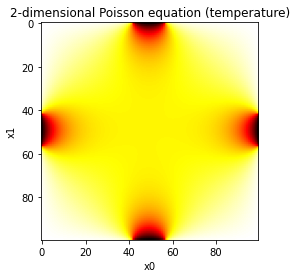

In [10]:
T = x.reshape(k, k)
plt.figure()
plt.imshow(T, cmap=cm.hot)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('2-dimensional Poisson equation (temperature)')

## Homework 2 Problem 2

In [354]:
ndim = k*k
b = np.zeros(shape = ndim)

# Fill in the four boundaries as appropriate
b[0        : k       ] += 1 # first 100 elements (0-99)
b[ndim - k : ndim    ] += 2 # last 100 elements (9900-9999)
b[0        : ndim : k] += 4 # every 100 elements from 0 to 9900
b[k-1      : ndim : k] += 8 # every 100 elements from 99 to 9999

print("First 100 elements: \n", b[0        : k       ])
print("Last 100 elements: \n", b[ndim - k : ndim    ])
print("Number of nonzero elements in b: ", np.count_nonzero(b))
print("Number of zero elements in b: ", len(b) - np.count_nonzero(b))

First 100 elements: 
 [5. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 9.]
Last 100 elements: 
 [ 6.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2. 10.]
Number of nonzero elements in b:  396
Number of zero elements in b:  9604


## Homework 2 Problem 3

In [4]:
P = np.array([[0,1,0,0], [0,0,0,1], [0,0,1,0], [1,0,0,0]])
print(P, "\nyomp")
print(P.T)
v = np.array([1,3,2,0])
w = np.array([3,0,2,1])

# Testing v and w on a few randomized 4x4 matrices:
for i in range(100000):
    A = np.random.random((4, 4))
    if (not ((A[v,:]) == P@A).all()):
        print("vector v is wrong: \n", A[v,:], "\n does not equal to \n", P @ A)
    if (not ((A[:,w]) == A@P).all()):
        print("vector w is wrong: \n", A[:,w], "\n does not equal to \n", A @ P)
print("Loop finished successfully")

[[0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]] 
yomp
[[0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]]
Loop finished successfully


## Homework 2 Problem 4

In [18]:
def Usolve(U, y, unit_diag=False):
    # Check the input
    m, n = U.shape
    assert m == n, "matrix U must be square"
    assert np.all(np.triu(U) == U), "matrix U must be upper triangular"
    assert np.all(np.diag(U) != 0), "matrix U must have nonzeroes on the diagonal"
    
    # Make a copy of the rhs that we will transform into the solution
    assert y.ndim == 1, "right-hand side must be a 1-dimensional vector"
    assert y.shape[0] == n, "right-hand side must be same size as matrix"
    x = y.astype(np.float64).copy()
    
    # Backward solve
    for col in reversed(range(n)):
        x[col] = (x[col] - (U[col, col+1:] @ x[col+1:])) / U[col, col]

    return x 

In [19]:
# LU function that uses cs111.LUfactor(), cs111.Lsolve(), and my Usolve()
def LUsolve(A, b, pivoting=True):
    """Solve a linear system Ax = b for x by LU factorization with partial pivoting.
    Parameters: 
      A: the matrix.
      b: the right-hand side
      pivoting: if False, don't do partial pivoting
    Outputs (in order):
      x: the computed solution
      rel_res: relative residual norm,
        norm(b - Ax) / norm(b)
    """
    
    # Check the input
    m, n = A.shape
    assert m == n, 'input matrix A must be square'
    
    # LU factorization
    L, U, p = cs111.LUfactor(A, pivoting=pivoting)
    
    # Forward and back substitution
    y = cs111.Lsolve(L, b[p])
    x = Usolve(U, y)
    
    # Residual norm
    rel_res = npla.norm(b - A@x) / npla.norm(b)
    
    return (x, rel_res)
# end of LUsolve

In [20]:
# testing Usolve() on its own:
for i in range(10000):
    b = np.random.rand(4)
    U = np.triu(np.random.random((4,4)))
    
    answer = np.around(scipy.sparse.linalg.spsolve(U,b),3) # ugly!
    our_answer = np.around(Usolve(U, b),3)
    
    if(not (answer==our_answer).all()):
        print("Something's wrong with loop 1.")
print("Loop 1 finished successfully")

# testing Usolve() with LUsolve():
for i in range(10000):
    b = np.random.rand(4)
    U = np.triu(np.random.random((4,4)))
    our_answer, rel_res = LUsolve(U, b)

    if(rel_res > 0.0001):
        print("Something's wrong with loop 2.")
print("Loop 2 finished successfully")

Loop 1 finished successfully
Loop 2 finished successfully


# Joosh Function

In [21]:
def chop(number, chop):
    num = str(number)
    maxlen = len(number)
    if(num[0] == '0'):
        temp = 0
        for i in num:
            if(i != '0' and i != '.'):
                break
            temp += 1
        if(temp + chop >= maxlen):
            return num
        return num[:temp + chop]
    else:
        if('.' in num[:chop]):
            if(chop + 1 >= maxlen):
                return num
            return num[:chop + 1]
        return num[:chop]

In [8]:
A = np.random.rand(6,6)
b = np.random.rand(6)
ans,res = cs111.LUsolve(A,b,pivoting=True)